In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
class ABCD:
    'ABCD matrix method'

    def __init__(self, freq, length, alpha, beta, couplingCapacitance, charImpedance, loadResistance):
        self.freq = freq
        self.length = length
        self.gamma = alpha + 1j*beta
        self.couplingCapacitance = couplingCapacitance
        self.charImpedance = charImpedance
        self.loadResistance = loadResistance
        
        self.s21 = self.s21(self.abcd(
            self.input(self.freq, self.couplingCapacitance),
            self.transmission(self.freq, self.length, self.gamma, self.charImpedance),
            self.output(self.freq, self.couplingCapacitance)),
            self.loadResistance)

    def input(self, freq, couplingCapacitance):
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def output(self, freq, couplingCapacitance):
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def transmission(self, freq, length, gamma, charImpedance):
        n=np.size(freq)
        t11 = np.cosh(gamma * length)
        t12 = charImpedance * np.sinh(gamma * length)
        t21 = (1/charImpedance) * np.sinh(gamma * length)
        t22 = np.cosh(gamma * length)
        return np.append(t11*np.ones(n),[t21*np.ones(n),t12*np.ones(n),t22*np.ones(n)]) \
            .reshape(n,2,2,order='F')
    
    def abcd(self, input, transmission, output):
        return input*transmission*output
    
    def s21(self, pABCD, loadResistance):
        A = pABCD[:,0,0]
        B = pABCD[:,0,1]
        C = pABCD[:,1,0]
        D = pABCD[:,1,1]
        RL = loadResistance
        return 2/( A + (B/RL)+ (C*RL) + D )


In [109]:
length=7186E-6
alpha=1.0E-3
beta=1.0E-4
couplingCapacitance=10E-15
charImpedance=50
loadResistance=50
freqRange=[0.1E9,400.0E9]
freqStep=0.1E9
freq = np.arange(freqRange[0], freqRange[1], freqStep)

In [110]:
abcd=ABCD(freq, length, alpha, beta, couplingCapacitance, charImpedance, loadResistance)
data=abcd.s21

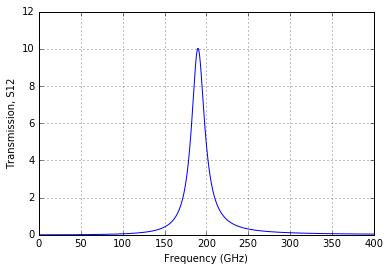

In [111]:
plt.plot(abcd.freq/10**9, np.imag(data))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission, S12')
plt.grid()